In [28]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
from scipy import stats          # For statistics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

'''Plotly visualization .'''
import plotly.offline as py
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

In [29]:
pwd

'/home/jchen16/kaggle'

In [30]:
train = pd.read_csv('~/kaggle/input/titanic/train.csv')
test = pd.read_csv('~/kaggle/input/titanic/test.csv')

In [31]:
merged = pd.concat([train, test], sort = False)

- Merge train and test data together. This eliminates the hassle of handling train and test data seperately for various analysis.

In [32]:
merged.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [33]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [34]:
merged.shape

(1309, 12)

In [35]:
merged.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
merged.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [37]:
merged['Pclass'] = merged['Pclass'].astype('object')

merged['Survived_cat'] = pd.Categorical(merged['Survived'])

In [38]:
merged

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cat
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,NaN
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,NaN
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,NaN
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,NaN


In [39]:
merged['Cabin'].value_counts()

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
D                  4
F4                 4
                  ..
E63                1
C128               1
F                  1
C103               1
B4                 1
Name: Cabin, Length: 186, dtype: int64

We don't really care about the frequency of each cabin; instead, we care about how many different kinds of cabin there are.

In [40]:
merged['Cabin'].value_counts().count()

186

In [41]:
merged.isnull().sum()/merged.shape[0]

PassengerId     0.000000
Survived        0.319328
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.200917
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000764
Cabin           0.774637
Embarked        0.001528
Survived_cat    0.319328
dtype: float64

In [42]:
merged.groupby('Sex').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Sex,,,,,,
female,648.186695,0.742038,28.687088,0.652361,0.633047,46.198097
male,658.766311,0.188908,30.585228,0.413998,0.247924,26.154601


In [43]:
merged.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [44]:
merged['Sex'].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [45]:
merged['Sex'].value_counts(normalize = True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [46]:
merged['Survived'].value_counts(normalize = True)

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

### Univariate charts

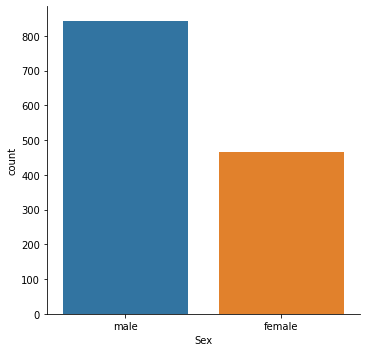

In [47]:
sns.catplot(x = 'Sex', kind = 'count', data = merged)

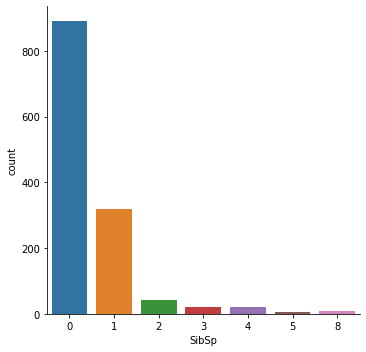

In [48]:
sns.catplot(x = 'SibSp', kind = 'count', data = merged)

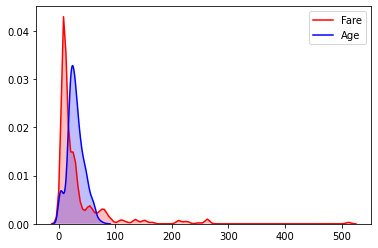

In [49]:
p1=sns.kdeplot(merged['Fare'], shade=True, color="r")
p1=sns.kdeplot(merged['Age'], shade=True, color="b")



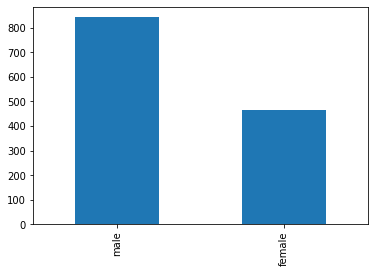

In [56]:
merged['Sex'].value_counts().plot.bar()

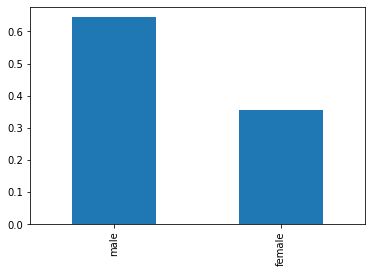

In [58]:
merged['Sex'].value_counts(normalize = True).plot.bar()

Create a histogram and density plot

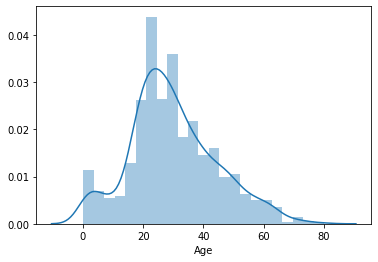

In [59]:
sns.distplot(merged['Age'].dropna())


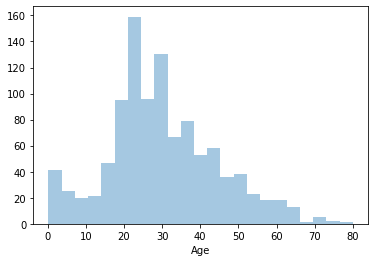

In [60]:
sns.distplot(merged['Age'].dropna(), kde = False)

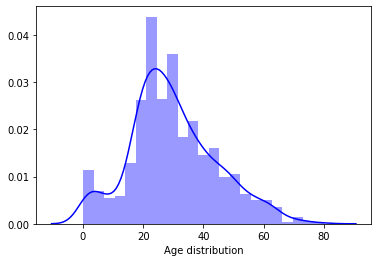

In [61]:
sns.distplot(merged['Age'].dropna(), color = 'blue', axlabel = 'Age distribution')

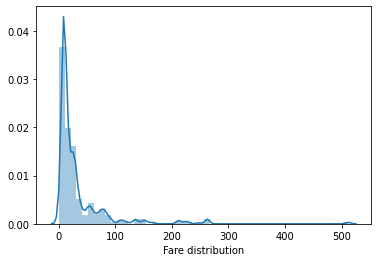

In [62]:
sns.distplot(merged['Fare'].dropna(), axlabel = 'Fare distribution')

Another way to create a histogram

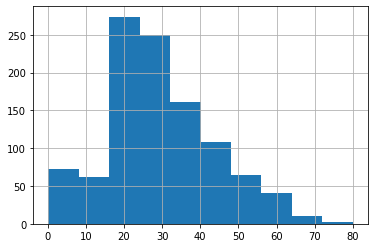

In [63]:
merged['Age'].hist()

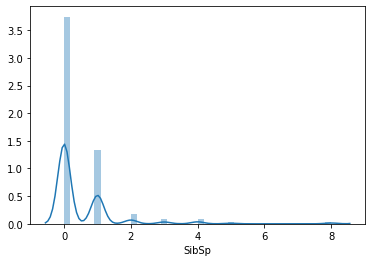

In [64]:
sns.distplot(merged['SibSp'])



The following works too, although it's designed for categorical variables. 

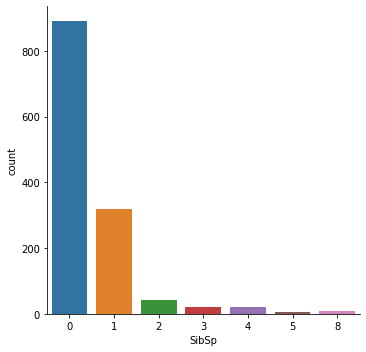

In [65]:
sns.catplot(x = 'SibSp', kind = 'count', data = merged)

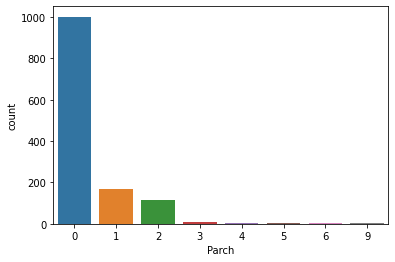

In [66]:
sns.countplot(x = 'Parch', data = merged)

### bi-variate charts

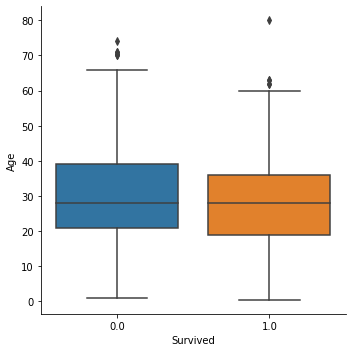

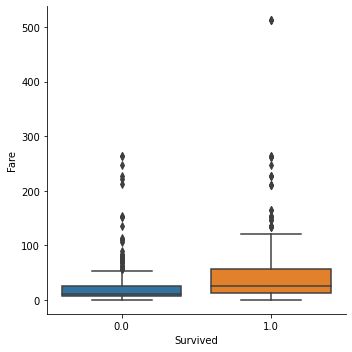

In [67]:
sns.catplot(x = 'Survived', y = 'Age', kind = 'box', data = merged)
sns.catplot(x = 'Survived', y = 'Fare', kind = 'box', data = merged)

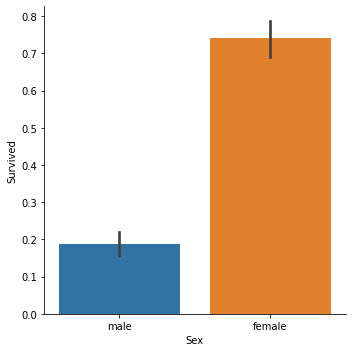

In [68]:
sns.catplot(y="Survived", x = 'Sex', data = merged, kind = 'bar')
# Note the following code doesn't work as countplot only works for one variable.
# sns.catplot(y = 'Survived', x = 'Sex', data = merged, kind = 'count')

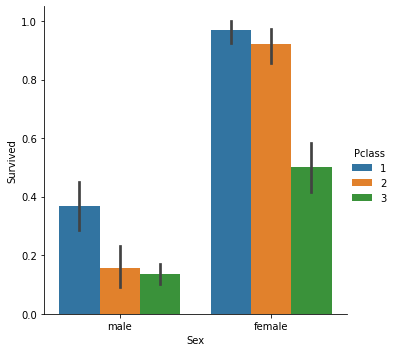

In [69]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=merged);



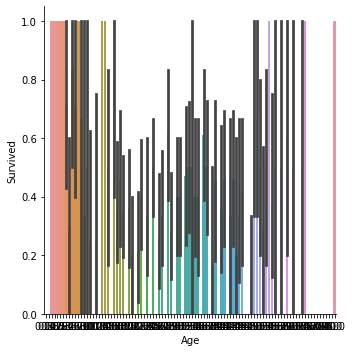

In [70]:
# Following code doesn't work because countplot only works for single variable!!!!!
# sns.countplot(x = 'Age', y = 'Survived', data = train)
sns.catplot(x = 'Age', y = 'Survived', kind = 'bar', data = merged)

The following chart that uses categorical version of Survived doesn't make sense

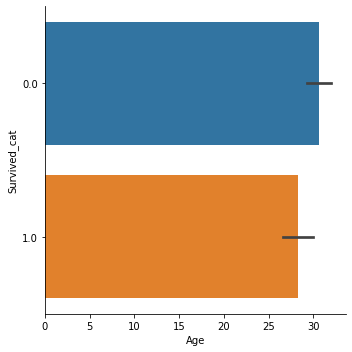

In [71]:
sns.catplot(x = 'Age', y = 'Survived_cat', kind = 'bar', data = merged)

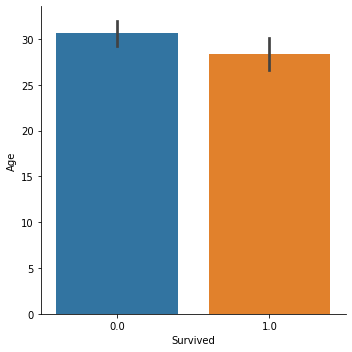

In [72]:
sns.catplot(x = 'Survived', y = 'Age', kind = 'bar', data = merged)

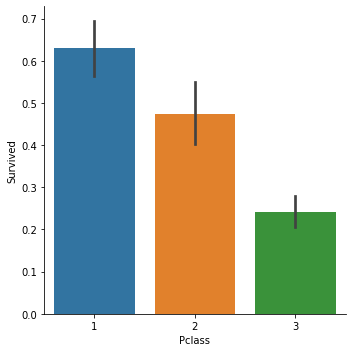

In [73]:
sns.catplot(x = 'Pclass', y = 'Survived', data = merged, kind = 'bar')

The following chart doesn't make sense.

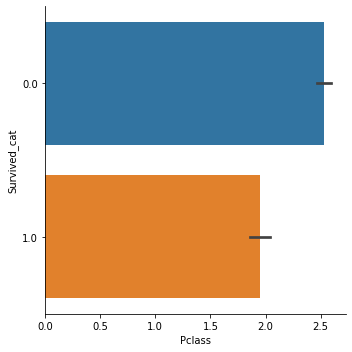

In [74]:
sns.catplot(x = 'Pclass', y = 'Survived_cat', data = merged, kind = 'bar')

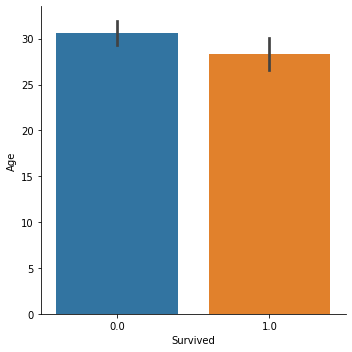

In [75]:
sns.catplot(y = 'Age', x = 'Survived', data = merged, kind = 'bar')

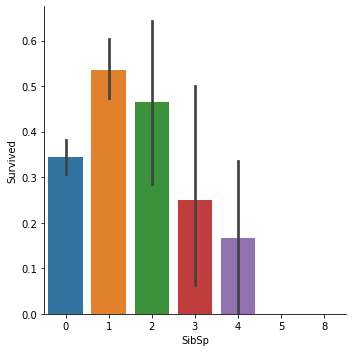

In [76]:
sns.catplot(x = 'SibSp', y = 'Survived', data = merged, kind = 'bar')

Equivalent to barplot function

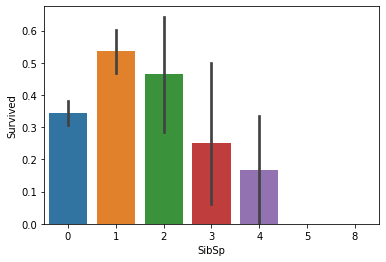

In [77]:
sns.barplot(x = 'SibSp', y = 'Survived', data = merged)

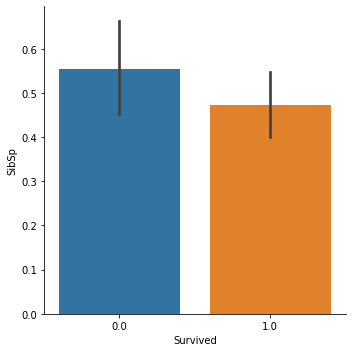

In [78]:
sns.catplot(x = 'Survived', y = 'SibSp', data = merged, kind = 'bar')

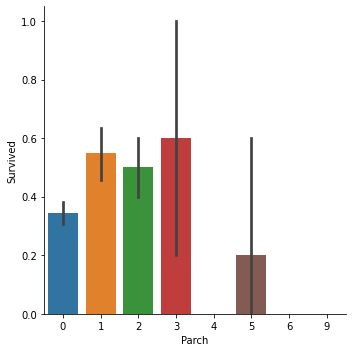

In [79]:
sns.catplot(x = 'Parch', y = 'Survived', data = merged, kind = 'bar')

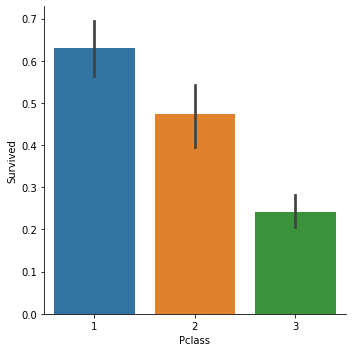

In [80]:
sns.catplot(x = 'Pclass', y = 'Survived', data = merged, kind = 'bar')

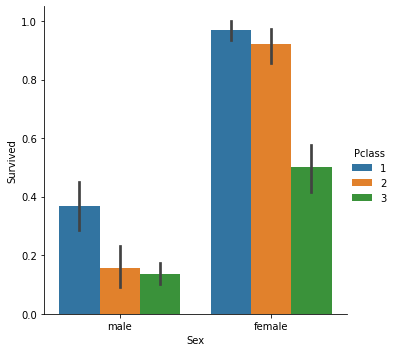

In [81]:
sns.catplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data = merged, kind = 'bar')

#### Break out the chart into different sections by a categorical variable

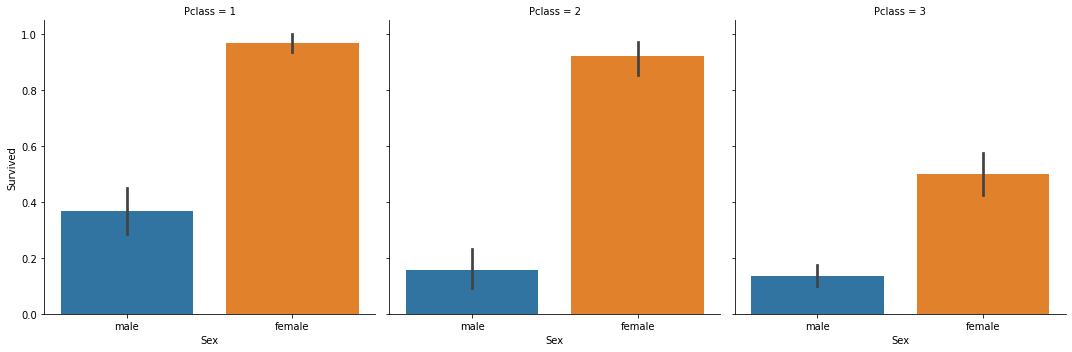

In [82]:
sns.catplot(x = 'Sex', y = 'Survived', col = 'Pclass', data = merged, kind = 'bar')

Although in a countplot function, there cannot have both x and y, we can use hue.

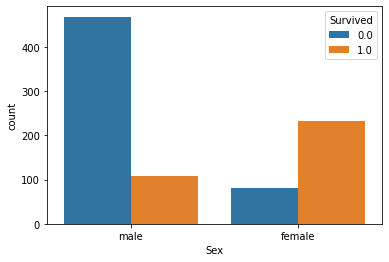

In [83]:
sns.countplot(x = 'Sex', hue = 'Survived', data = merged)

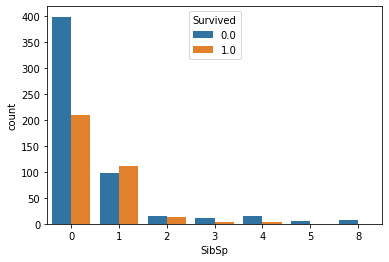

In [84]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = merged)

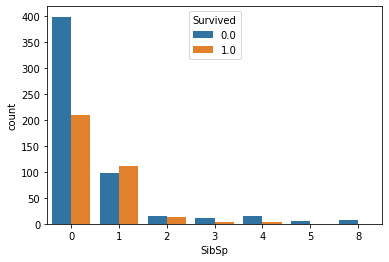

In [85]:
sns.countplot(x = 'SibSp', hue = 'Survived', data = merged)

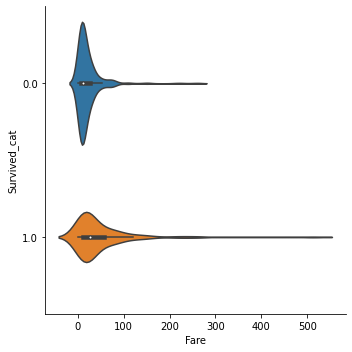

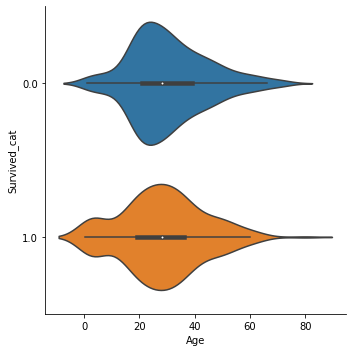

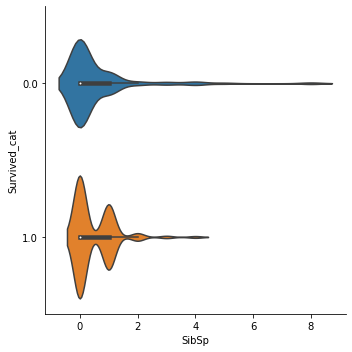

In [86]:
# Have to use categorical variable here; otherwise the chart will not show up.
sns.catplot(x="Fare",y="Survived_cat",kind='violin',data=merged)
sns.catplot(x="Age",y="Survived_cat",kind='violin',data=merged)
sns.catplot(x="SibSp",y="Survived_cat",kind='violin',data=merged)

### Line plot - numerical vs. numerical variables.

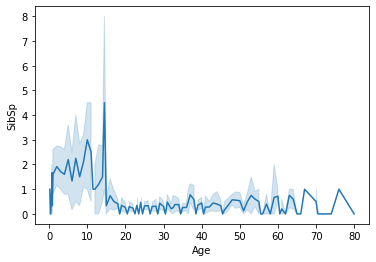

In [87]:
sns.lineplot(x = 'Age', y = 'SibSp', data = merged)

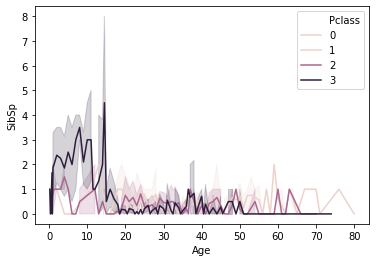

In [88]:
sns.lineplot(x = 'Age', y = 'SibSp', hue = 'Pclass', data = merged)

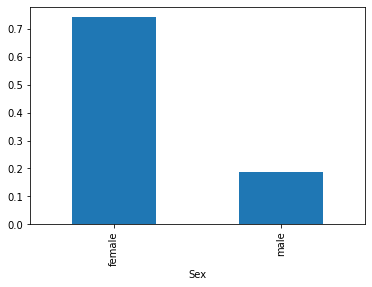

In [89]:
merged.groupby(['Sex'])['Survived'].mean().plot(kind='bar')

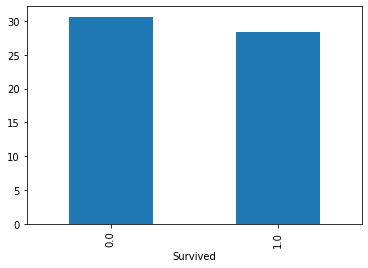

In [90]:
merged.groupby(['Survived'])['Age'].mean().plot(kind='bar')

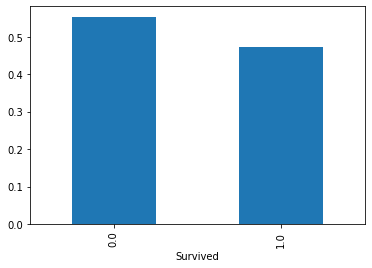

In [91]:
merged.groupby(['Survived'])['SibSp'].mean().plot(kind = 'bar')

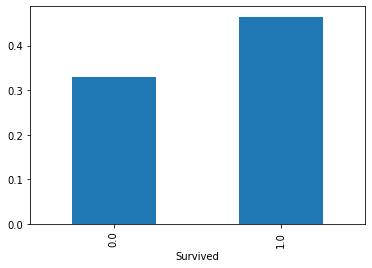

In [92]:
merged.groupby(['Survived'])['Parch'].mean().plot(kind = 'bar')

In [93]:
pd.crosstab(merged['Sex'], merged['Pclass'])

Pclass,1,2,3
Sex,,,
female,144,106,216
male,179,171,493


## Feature engineering

### Cabin

In [94]:
merged['Cabin'].value_counts().count()

186

In [95]:
merged['Cabin'].value_counts(dropna = False).count()

187

It is reasonable to presume that those NaNs didn't have a cabin, which could tell us something about 'Survived'. We will flag NaN as 'X' and keep only the 1st character where Cabin has alphanumeric values.

In [96]:
"""Flag all the NaNs of Cabin as 'X'."""
merged['Cabin'].fillna(value = 'X', inplace = True)
merged['Cabin'].isnull().sum()

0

In [97]:
'''Keep only the 1st character where Cabin is alphanumerical.'''
merged['Cabin'] = merged['Cabin'].apply( lambda x : x[0])
display(merged['Cabin'].value_counts())

X    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

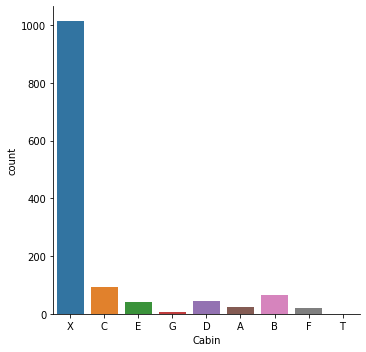

In [98]:
sns.catplot(x = 'Cabin', data = merged, kind = 'count')

In [99]:
pd.options.display.max_rows = 100

### Name

In [100]:
display(merged['Name'])

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
413                                   Spector, Mr. Woolf
414                         Oliva y Ocana, Dona. Fermina
415                         Saether, Mr. Simon Sivertsen
416                                  Ware, Mr. Frederick
417                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: object

In [101]:
merged['Title'] = merged['Name'].str.extract('([A-Za-z]+)\.')
merged['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Mlle          2
Ms            2
Major         2
Sir           1
Capt          1
Lady          1
Countess      1
Jonkheer      1
Dona          1
Don           1
Mme           1
Name: Title, dtype: int64

We can see there are several titles with the very least frequency. So, it makes sense to put them in fewer buckets. Professionals like Dr, Rev, Col, Major, Capt will be put into 'Officer' bucket. Titles such as Dona, Jonkheer, Countess, Sir, Lady, Don were usually entitled to the aristocrats and hence these titles will be put into bucket 'Aristocrat'. We would also replace Mlle and Ms with Miss and Mme by Mrs as these are French titles.

In [102]:
'''Create a bucket Officer and put Dr, Rev, Col, Major, Capt titles into it.'''
merged['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace = True)

'''Put Dona, Jonkheer, Countess, Sir, Lady, Don in bucket Aristocrat.'''
merged['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

'''Finally Replace Mlle and Ms with Miss. And Mme with Mrs.'''
merged['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

merged['Title'].value_counts()

Mr            757
Miss          264
Mrs           198
Master         61
Officer        23
Aristocrat      6
Name: Title, dtype: int64

### Family size

Create a new variable 'Family_size' from SibSp & Parch

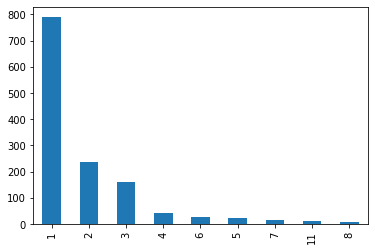

In [104]:
merged['Family_size'] = merged['SibSp'] + merged['Parch'] + 1
merged['Family_size'].value_counts().plot.bar()

We will create 4 buckets namely single, small, medium, and large for rest of them.

In [105]:
'''Create buckets of single, small, medium, and large and then put respective values into them.'''
merged['Family_size'].replace(to_replace = [1], value = 'single', inplace = True)
merged['Family_size'].replace(to_replace = [2,3], value = 'small', inplace = True)
merged['Family_size'].replace(to_replace = [4,5], value = 'medium', inplace = True)
merged['Family_size'].replace(to_replace = np.arange(6,12), value = 'large', inplace = True)

merged['Family_size'].value_counts()

single    790
small     394
medium     65
large      60
Name: Family_size, dtype: int64

### Ticket

In [106]:
merged['Ticket'].value_counts()

CA. 2343    11
CA 2144      8
1601         8
PC 17608     7
347082       7
            ..
364499       1
348121       1
345768       1
350408       1
65306        1
Name: Ticket, Length: 929, dtype: int64

We will use IQR method to detect the outliers for variable Age and Fare though we won't remove them.

In [107]:
print("the 50% quartile of age is {}".format(merged['Age'].quantile(0.5)))

the 50% quartile of age is 28.0


In [108]:
'''Create a function to count total outliers. And plot variables with and without outliers.'''
def outliers(variable):
    global filtered
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0)

    # Create subplots
    out_variables = [variable, filtered]
    out_titles = [' Distribution with Outliers', ' Distribution Without Outliers']
    title_size = 25
    font_size = 18
    plt.figure(figsize = (25, 15))
    for ax, outlier, title in zip(range(1,3), out_variables, out_titles):
        plt.subplot(2, 1, ax)
        sns.boxplot(outlier).set_title('%s' %outlier.name + title, fontsize = title_size)
        plt.xticks(fontsize = font_size)
        plt.xlabel('%s' %outlier.name, fontsize = font_size)

Total Outliers of Age : 9


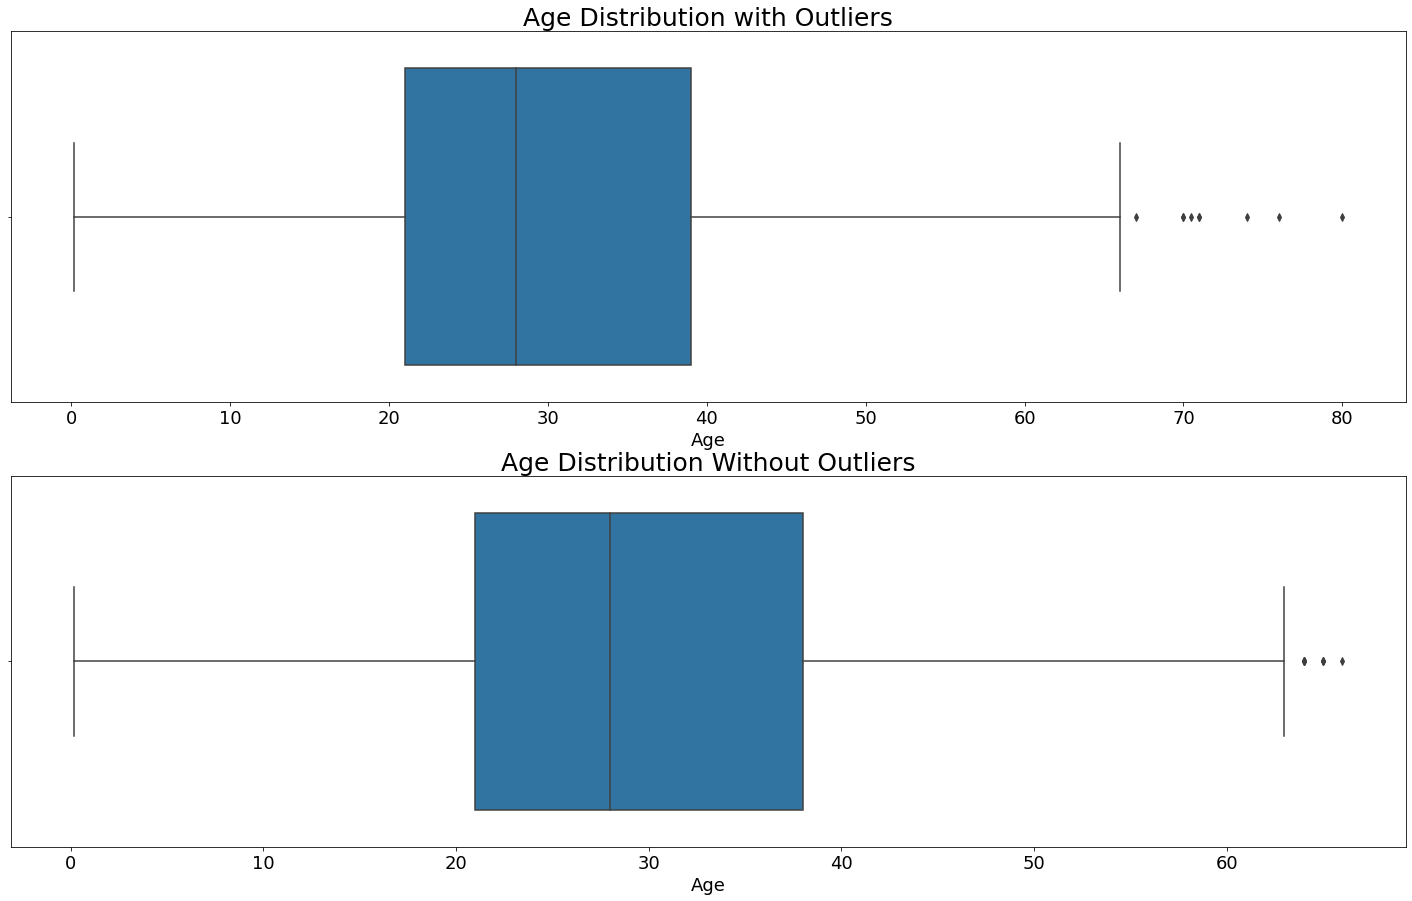

In [109]:
'''Count total outliers of Age. Plot Age with and without outliers.'''
outliers(merged.Age)

### Impute missing values

In [110]:
merged.isnull().sum() > 0

PassengerId     False
Survived         True
Pclass          False
Name            False
Sex             False
Age              True
SibSp           False
Parch           False
Ticket          False
Fare             True
Cabin           False
Embarked         True
Survived_cat     True
Title           False
Family_size     False
dtype: bool

For categorical variables mode-imputation is performed and for numerical variable mean-impuation is performed **if its distribution is symmetric** (or almost symmetric or normal like Age). On the other hand, for a variable with skewed distribution and outliers (like Fare), meadian-imputation is recommended as median is more immune to outliers than mean.

However, one clear disadvantage of using mean, median or mode to impute missing values is the addition of bias if the amount of missing values is significant (like Age). So simply replacing them with the mean or the median age might not be the best solution since the age may differ by groups and categories of passengers.

To solve this, we can group our data by some variables that have no missing values and for each subset compute the median age to impute the missing values. Or we can build a linear regression model that will predict missing values of Age using the features that have no missing values. These two methods may result in better accuracy without high bias, unless a missing value is expected to have a very high variance. We will show the former method of imputation

*Let's first look for variables with the missing values using Plotly's scatter plot.*

In [111]:
'''Function to plot scatter plot'''
def scatter_plot(x, y, title, yaxis, size, c_scale):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = 'markers',
    marker = dict(color = y, size = size, showscale = True, colorscale = c_scale))
    layout = go.Layout(hovermode= 'closest', title = title, yaxis = dict(title = yaxis))
    fig = go.Figure(data = [trace], layout = layout)
    return iplot(fig)

#### Nice trick to select the columns with missing values

In [112]:
merged.loc[:, merged.isnull().sum()>0].count()

Survived         891
Age             1046
Fare            1308
Embarked        1307
Survived_cat     891
dtype: int64

In [113]:
merged['Fare'].count()

1308

In [114]:
missing_columns = len(merged) - merged.loc[:, merged.isnull().sum()>0].count()
missing_columns
# shows how many missing values there are for the columns

Survived        418
Age             263
Fare              1
Embarked          2
Survived_cat    418
dtype: int64

In [115]:
x = missing_columns.index
x
y = missing_columns
y

Survived        418
Age             263
Fare              1
Embarked          2
Survived_cat    418
dtype: int64

In [116]:
'''Get and plot only the missing columns with their missing values.'''
missing_columns = len(merged) - merged.loc[:, merged.isnull().sum()>0].count()
x = missing_columns.index
y = missing_columns
title = 'Features with Missing Values'
scatter_plot(x, y, title, 'Missing Values', 30, 'Rainbow')

### Impute missing values for embarked and Fare

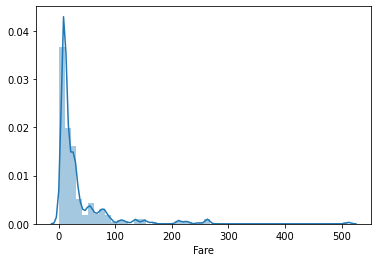

In [117]:
sns.distplot(merged['Fare'].dropna())

In [118]:
merged['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [119]:
'''Impute missing values of Embarked. Embarked is a categorical variable where S is the most frequent.'''
merged.Embarked.fillna(value = 'S', inplace = True)

'''Impute missing values of Fare. Fare is a numerical variable with outliers. Hence it will be imputed by median.'''
merged.Fare.fillna(value = merged.Fare.median(), inplace = True)

#### Impute age

To impute Age with grouped median, we need to know which features are heavily correlated with Age. Let's find out the variables correlated with Age.

NameError: name 'ax' is not defined

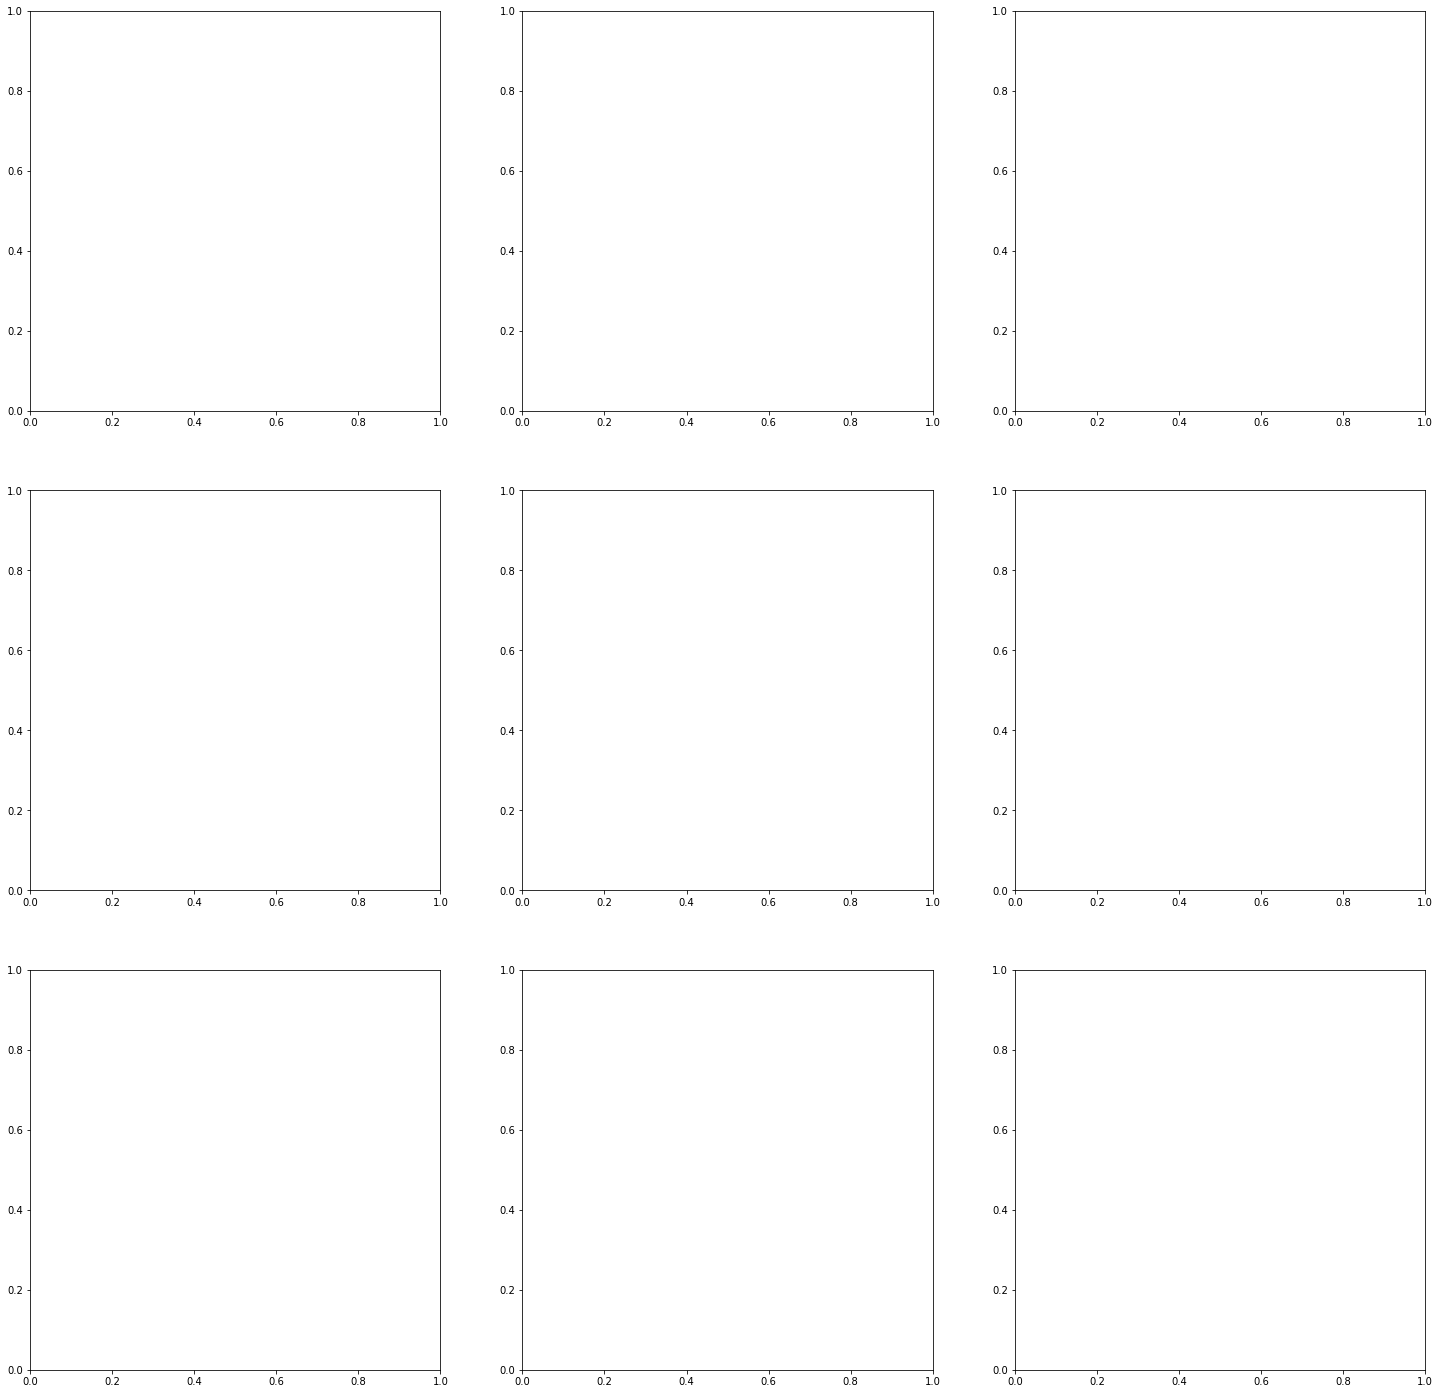

In [120]:
correlation = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (25,25))
sns.boxplot(x = correlation['Sex'], y =  merged.Age, ax = ax)

In [126]:
## Zip is used to join two tuples together
zip(axes.flatten(), correlation.columns)

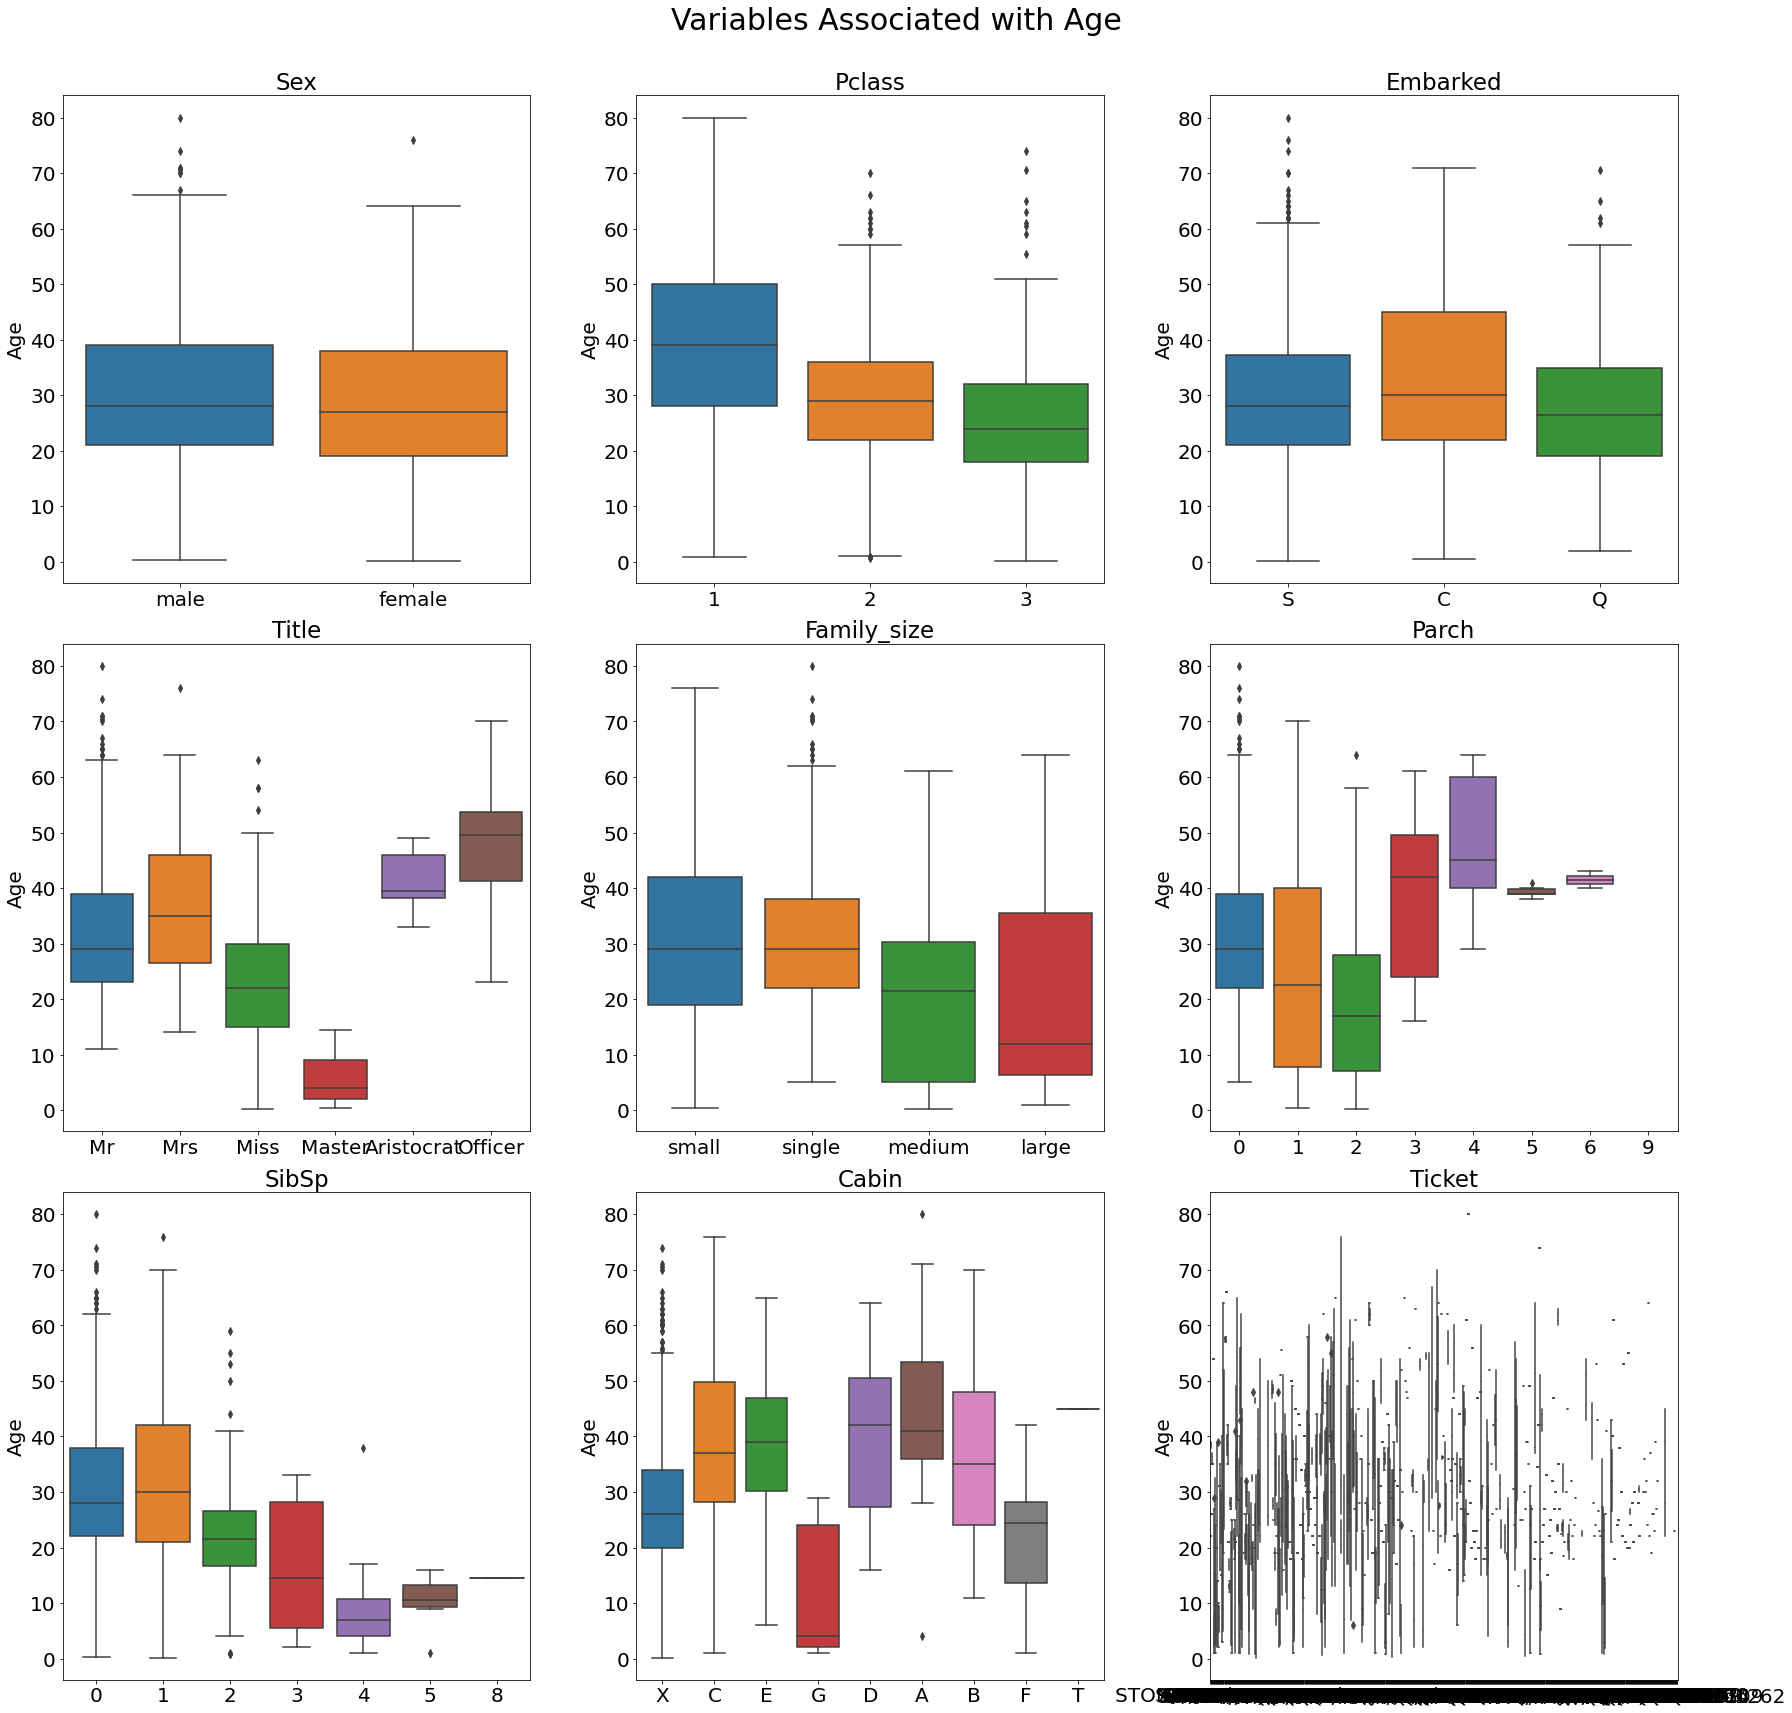

In [131]:
"""Create a boxplot to view the variables correlated with Age. First extract the variables we're interested in."""
correlation = merged.loc[:, ['Sex', 'Pclass', 'Embarked', 'Title', 'Family_size', 'Parch', 'SibSp', 'Cabin', 'Ticket']]
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (25,25))
for ax, column in zip(axes.flatten(), correlation.columns):
    sns.boxplot(x = correlation[column], y =  merged.Age, ax = ax)
    ax.set_title(column, fontsize = 23)
    ax.tick_params(axis = 'both', which = 'major', labelsize = 20)
    ax.tick_params(axis = 'both', which = 'minor', labelsize = 20)
    ax.set_ylabel('Age', fontsize = 20)
    ax.set_xlabel('')
fig.suptitle('Variables Associated with Age', fontsize = 30)
fig.tight_layout(rect = [0, 0.03, 1, 0.95])

**Findings**

- Age seems to be correlated with PClass, Title, Family_size, SibSp, Parch, and Cabin

In [132]:
"""Let's plot correlation heatmap to see which variable is highly correlated with Age and if our boxplot interpretation holds true. 
We need to convert categorical variable into numerical to plot correlation heatmap. So convert categorical variables into numerical."""
from sklearn.preprocessing import LabelEncoder
correlation = correlation.agg(LabelEncoder().fit_transform)
correlation['Age'] = merged.Age # Inserting Age in variable correlation.
correlation = correlation.set_index('Age').reset_index() # Move Age at index 0.

In [133]:
correlation['Family_size'].value_counts()

2    790
3    394
1     65
0     60
Name: Family_size, dtype: int64

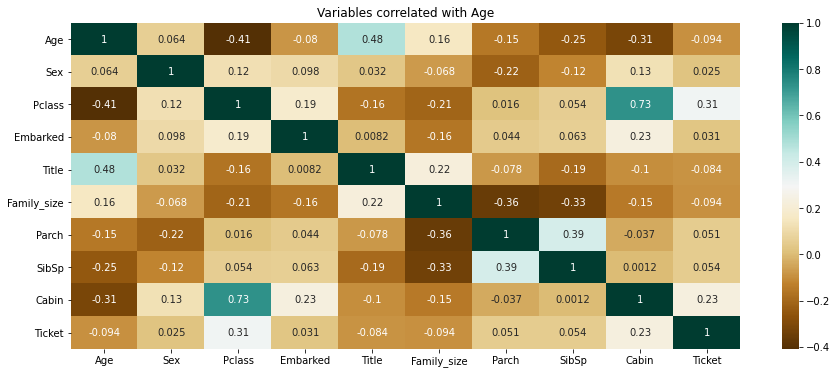

In [134]:
# Now create the heatmap correlation
plt.figure(figsize=(15,6))
sns.heatmap(correlation.corr(), cmap ='BrBG',annot = True)
plt.title('Variables correlated with Age')
plt.show()

**Findings**: 

As expected Sex, Embarked, and Ticket have the weakest correlation with Age what we could guess beforehand from boxplot. Parch and Family_size are moderately correlated with Age. Title, Pclass, Cabin, and SibSp have the highest correlation with Age. But we are gonna use Title and Pclass only in order to impute Age since they have the strongest correlation with Age. So the tactic is to impute missing values of Age with the median age of similar rows according to Title and Pclass.

In [135]:
merged.groupby(['Title', 'Pclass'])['Age'].mean()

Title       Pclass
Aristocrat  1         41.166667
Master      1          6.984000
            2          2.757273
            3          6.090000
Miss        1         30.131148
            2         20.865714
            3         17.360874
Mr          1         41.450758
            2         32.346715
            3         28.318910
Mrs         1         42.926471
            2         33.518519
            3         32.326531
Officer     1         50.916667
            2         40.700000
Name: Age, dtype: float64

**Note the use of transform along with lambda**

In [136]:
'''Impute Age with median of respective columns (i.e., Title and Pclass).'''
merged.Age = merged.groupby(['Title', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

In [137]:
merged.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Survived_cat    418
Title             0
Family_size       0
dtype: int64

If we want to normalize the variables, we can use the following code --

**df.transform(lambda x: (x - x.mean()) / x.std())**

### Bivariate analysis

Being the most important part, bivariate analysis tries to find the relationship between two variables. We will look for correlation or association between our predictor and target variables. Bivariate analysis is performed for any combination of categorical and numerical variables. The combination can be: Numerical & Numerical, Numerical & Categorical and Categorical & Categorical. Different methods are used to tackle these combinations during analysis process. The methods are:

- Numerical & Numerical: Pearson's correlation, or Spearman correlation (doesn't require normal distribution).
- Numerical & Categorical: Point biserial correlation (only if categorical variable is binary type), or ANOVA test. For this problem, you can use either biserial correlation or ANOVA. But I will perform both test just to learn because ANOVA will come in handy if categorical variable has more than two groups.
- Categorical & Categorical: We would use Chi-square test for bivariate analysis between categorical variables.

#### Numerical and categorical

First we create a boxplot between our numerical and categorical variables to check if the distribution of numerical variable is distinct in different classes of nominal variables. Then we find the mean of numerical variable for every class of categorical variable. Again we plot a histogram of numerical variable for every class of categorical variable. Finally anova or point biserial correlation (in case of two class categorical variable) is calculated to find association between nominal and numerical variables.

In [ ]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = merged.iloc[:891, :]
df_test = merged.iloc[891:, :]

In [ ]:
'''#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation.'''
def boxplot_and_correlation(cat,num):
    '''cat = categorical variable, and num = numerical variable.'''
    plt.figure(figsize = (18,7))
    title_size = 18
    font_size = 15
    ax = sns.boxplot(x = cat, y = num)
    
    # Select boxes to change the color
    box = ax.artists[0]
    box1 = ax.artists[1]
    
    # Change the appearance of that box
    box.set_facecolor('red')
    box1.set_facecolor('green')
    plt.title('Association between Survived & %s' %num.name, fontsize = title_size)
    plt.xlabel('%s' %cat.name, fontsize = font_size)
    plt.ylabel('%s' %num.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.show()
    print('Correlation between', num.name, 'and', cat.name,':', stats.pointbiserialr(num, cat))

'''#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean.'''
def nume_grouped_by_cat(num, cat):
    global ax
    font_size = 15
    title_size = 18
    grouped_by_cat = num.groupby(cat).mean().sort_values( ascending = False)
    grouped_by_cat.rename ({1:'survived', 0:'died'}, axis = 'rows', inplace = True) # Renaming index
    grouped_by_cat = round(grouped_by_cat, 2)
    ax = grouped_by_cat.plot.bar(figsize = (18,5)) 
    abs_bar_labels()
    plt.title('Mean %s ' %num.name + ' of Survivors vs Victims', fontsize = title_size)
    plt.ylabel('Mean ' + '%s' %num.name, fontsize = font_size)
    plt.xlabel('%s' %cat.name, fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.show()

'''#3.This function plots histogram of numerical variable for every class of categorical variable.'''
def num_hist_by_cat(num,cat):
    font_size = 15
    title_size = 18
    plt.figure(figsize = (18,7))
    num[cat == 1].hist(color = ['g'], label = 'Survived', grid = False)
    num[cat == 0].hist(color = ['r'], label = 'Died', grid = False)
    plt.yticks([])
    plt.xticks(fontsize = font_size)
    plt.xlabel('%s' %num.name, fontsize = font_size)
    plt.title('%s ' %num.name + ' Distribution of Survivors vs Victims', fontsize = title_size)
    plt.legend()
    plt.show()
   
'''#4.Create a function to calculate anova between numerical and categorical variable.'''
def anova(num, cat):
    from scipy import stats
    grp_num_by_cat_1 = num[cat == 1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    grp_num_by_cat_0 = num[cat == 0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    f_val, p_val = stats.f_oneway(grp_num_by_cat_1, grp_num_by_cat_0) # Calculate f statistics and p value
    print('Anova Result between ' + num.name, ' & '+ cat.name, ':' , f_val, p_val)  

#### Fare and suvived

In [ ]:
boxplot_and_correlation(df_train.Survived, df_train.Fare)

In [ ]:
sns.catplot(x = 'Survived', y = 'Fare', data = df_train, kind = 'bar')

In [ ]:
df_train.loc[df_train['Survived'] == 1, 'Fare'].hist()
df_train.loc[df_train['Survived'] == 0, 'Fare'].hist()

In [ ]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
anova(df_train.Fare, df_train.Survived)

#### Age and Survived

In [ ]:
"""Let's create a box plot between Age and Survived to have an idea by how much Age is associated with Survived. Also find point biserial correlation between them."""
boxplot_and_correlation(df_train.Survived, df_train.Age)

In [ ]:
sns.catplot(x = 'Survived', y = 'Age', data = df_train, kind = 'bar')

In [ ]:
df_train.loc[df_train['Survived'] == 1, 'Age'].hist()
df_train.loc[df_train['Survived'] == 0, 'Age'].hist()

In [ ]:
'''Perform ANOVA between all the levels of Survived (i.e.., 0 and 1) and Age.'''
anova(df_train.Age, df_train.Survived)